In [1]:
%pylab inline

from matplotlib import style
style.use('fivethirtyeight')

Populating the interactive namespace from numpy and matplotlib


<H2>Generate signal</H2>

<P>A linear-frequency chirp or simply linear chirp, the instantaneous frequency ${\displaystyle f(t)}$ varies exactly linearly with time. It is also known as a Zap input. It is a signal that sweeps through diffrent frequencies over time</P>

<P>Puil et al., 1986. Quantification of membrane properties of trigemenal root ganglions in guinea pigs. J. Neurophysiol. 55, 955-1016.</P>

In [2]:
from numpy import pi as PI

def chirp(t, f0, f1, dur):
    """
    f0 is the initial frequency
    f1 is the final frequency
    dur is the time it takes to sweep form f0 to f1
    t is the time that has elapsed from the start to the frequency ramp
    """
    return np.sin(2*PI*( f0 + (f1-f0)*t/(2*dur) )* t)


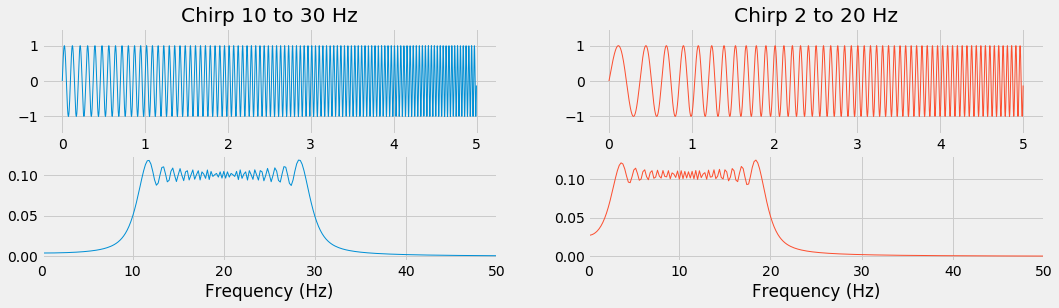

In [3]:
## create 5 second chirp signal with the following parameters.

# chirp between 10 and 30 Hz
sf = 1000 # sampling frequency
dt = 1/sf
time = np.arange(0,5,dt)
Nyquist = sf/2 

# Define a chirp function like Udemy curse
f = (10,30) # frequencies in Hz
ff = np.linspace(f[0], np.mean(f), time.size)
signal1 = np.sin(2*PI*ff*time)

# chirp betwen 2 and 20 Hz
signal2 = chirp(time, f0=2, f1=20, dur =5)

# Fourier Transform of the first signal
fsignal1 = np.fft.fft(signal1)/signal1.size
Nsamples = int(np.floor(signal1.size/2))
hz = np.linspace(0, Nyquist, Nsamples +1)
amp1 = 2*np.abs(fsignal1)

# Fourier Transform of the second signal
fsignal2 = np.fft.fft(signal2)/signal2.size
amp2 = 2*np.abs(fsignal2)

fig, ax = plt.subplots(2,2, figsize = (16,4))#

ax[0,0].plot(time, signal1, lw = 1, color='C0')
ax[0,0].set_ylim(-1.5,1.5)
ax[0,0].set_xlabel('Time (sec)')
ax[0,0].set_title('Chirp 10 to 30 Hz')

ax[0,1].plot(time, signal2, lw =1, color='C1')
ax[0,1].set_ylim(-1.5,1.5)
ax[0,1].set_xlabel('Time (sec)')
ax[0,1].set_title('Chirp 2 to 20 Hz')
    
ax[1,0].plot(hz, amp1[:hz.size], color = 'C0', lw=1)
ax[1,0].set_xlim(xmin = 0, xmax =50)
ax[1,0].set_xlabel('Frequency (Hz)')

ax[1,1].plot(hz, amp2[:hz.size], color = 'C1', lw=1)
ax[1,1].set_xlim(xmin = 0, xmax =50)
ax[1,1].set_xlabel('Frequency (Hz)');


In [4]:
0.025*sf

25.0

In [5]:
# now we will analyze window lenghts of 500 ms in 25 ms steps. 
# Signals will overlap 475 ms
WinLength = int(0.5*sf) # 500 points (0.5 sec, 500 ms)
step = int(0.025*sf) # 25 points (or 25 ms)

# we have less resolution here because the signals are smaller
Nsamples = int( np.floor(WinLength/2) )
hz = np.linspace(0,Nyquist, Nsamples+1)

In [6]:
nsteps = int(np.floor ( (signal1.size - WinLength)/step) )
print(signal1.size, nsteps)

5000 180


<H2>Spectrogram of signal 1 (countour plot)</H2>

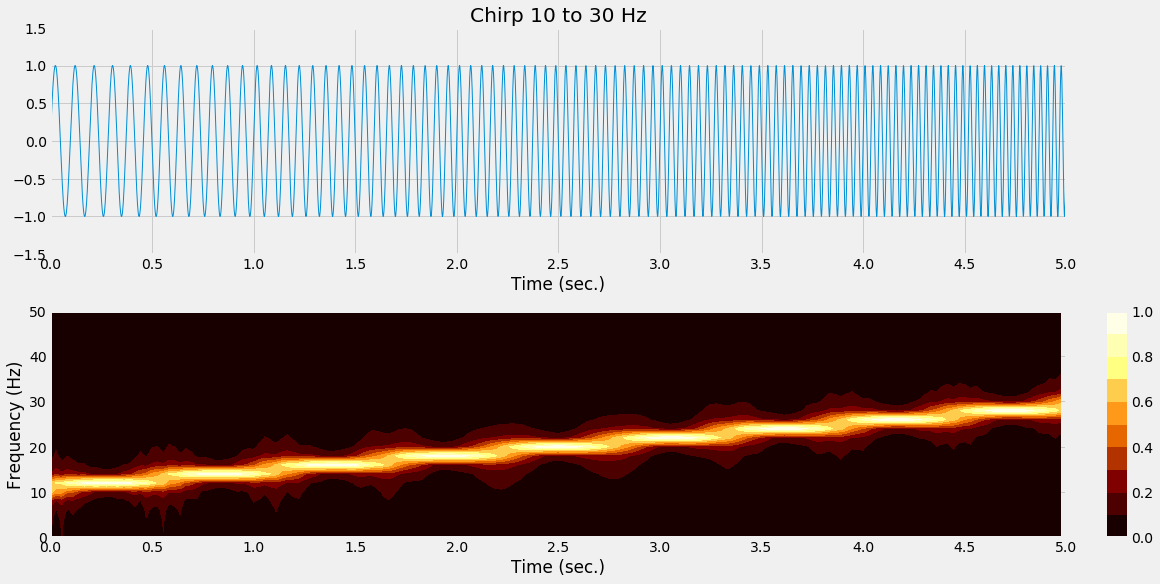

In [7]:
# time-frequency matrix
tf = np.empty( (hz.size, nsteps ))

myamp = list()
for i in range(nsteps):
    
    # slice signal
    data = signal1[i*step:i*step+WinLength]
    
    fftcoef = np.fft.fft(data)/WinLength
    myamp.append( 2*np.abs(fftcoef[:len(hz)]) )
    
# plot

fig, ax = plt.subplots(2,1, figsize = (16,8), constrained_layout=True)
#fig.suptitle('Time-frequency power via short-time FFT')

ax[0].plot(time, signal1, lw = 1, color='C0')
ax[0].set_ylim(-1.5,1.5)
ax[0].set_title('Chirp 10 to 30 Hz')

# spectrum is a ContourSet object
dt = 5/180 # 5 seconds in 180 samples
X = np.arange(nsteps)*dt
Y = hz
Z = np.array(myamp).T
levels = 10
spectrum = ax[1].contourf(X,Y,Z,levels,cmap='afmhot')#,'linecolor','none')
ax[1].set_ylim([0,50])

ax[1].set_ylabel('Frequency (Hz)')

fig.colorbar(spectrum, fraction = 0.05, ticks = np.arange(0,1.2,.2))

for myax in ax:
    myax.set_xlim(0, 5)
    myax.set_xticks(np.arange(0, 5.5, 0.5))
    myax.set_xlabel('Time (sec.)')

<H2>Spectrogram of signal2 </H2>

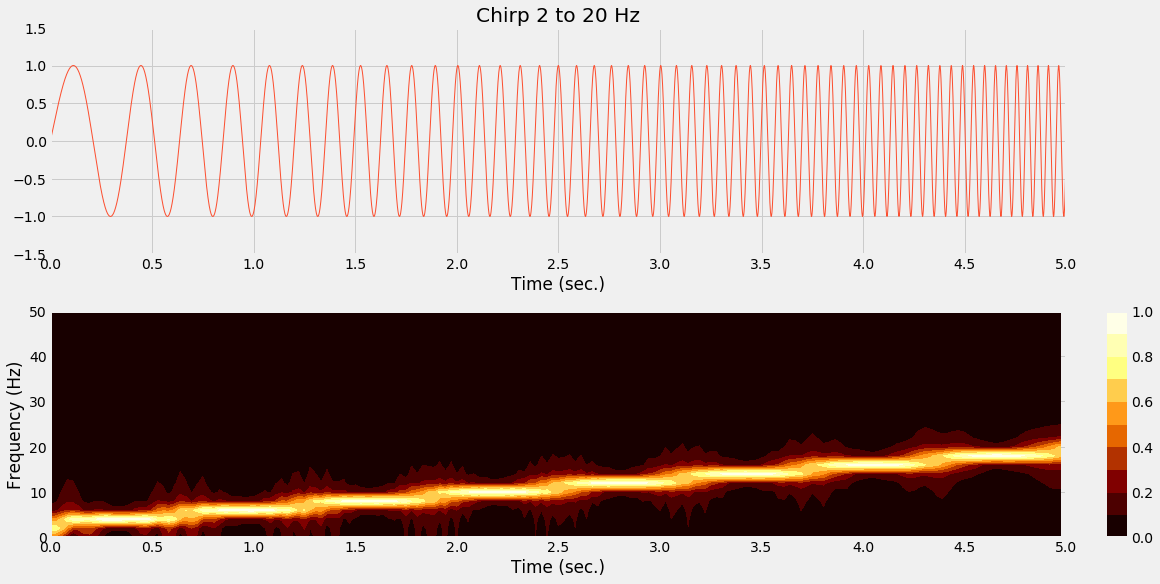

In [11]:
# time-frequency matrix
tf = np.empty( (hz.size, nsteps ))

myamp = list()
for i in range(nsteps):
    
    # slice signal
    data = signal2[i*step:i*step+WinLength]
    
    fftcoef = np.fft.fft(data)/WinLength
    myamp.append( 2*np.abs(fftcoef[:len(hz)]) )
    
# plot

fig, ax = plt.subplots(2,1, figsize = (16,8), constrained_layout=True)
#fig.suptitle('Time-frequency power via short-time FFT')

ax[0].plot(time, signal2, lw = 1, color='C1')
ax[0].set_ylim(-1.5,1.5)
ax[0].set_title('Chirp 2 to 20 Hz')

# spectrum is a ContourSet object
dt = 5/180 # 5 seconds in 180 samples
X = np.arange(nsteps)*dt
Y = hz
Z = np.array(myamp).T
levels = 10
spectrum = ax[1].contourf(X,Y,Z,levels,cmap='afmhot')#,'linecolor','none')
ax[1].set_ylim([0,50])

ax[1].set_ylabel('Frequency (Hz)')

fig.colorbar(spectrum, fraction = 0.05, ticks = np.arange(0,1.2,.2))

for myax in ax:
    myax.set_xlim(0, 5)
    myax.set_xticks(np.arange(0, 5.5, 0.5))
    myax.set_xlabel('Time (sec.)')